In [ ]:
#Coded and analyzed by Giuseppe DeLeers-Certo
#    B ME 450
#    Dr. Abadi
#    3/12/19

#  pH Variance between Atlantic Hemispheres

In [68]:
import os
import numpy as np
import numpy.ma as ma
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [79]:
site=1
#Site 1 is the Argentinian Basin, coords (-42.4924,-42.1626)
#Site 2 is the Irminger Sea, coords (59.71823,-39.3536)
#Measurements span from Jan 11, 2016 to May 1, 2017
#All data provided courtesy of the OOI.

aTotal=np.ndarray(shape=(18,2))
while site<3:
    fileAppendix='Site'+str(site)+'\\'
    directory = 'C:\\Users\\Giuse\\Desktop\\BME 450\\Project\\'+fileAppendix
    rowCount=0
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            #Some fields are missing from the data, so they're replaced with 0 and masked below
            data = np.genfromtxt(directory+filename, delimiter = ',', skip_header = 1, filling_values=0, usecols=(19))
            maskedData= ma.masked_values(data,0)
            #Data is averaged and saved here. Each value represents an average over about a month.
            aTotal[rowCount,site-1]=np.average(maskedData[:])
            rowCount=rowCount+1
    site=site+1
print(aTotal)

[[8.06980718 8.08655497]
 [7.98658631 8.08709978]
 [7.81480725 8.08921176]
 [7.84687302 8.09797239]
 [7.86475652 8.11390509]
 [7.94623436 8.12884306]
 [7.95383491 7.90702043]
 [7.88174054 8.12017506]
 [6.05857684 8.11527641]
 [6.05383335 8.11076292]
 [6.32904646 8.11283605]
 [8.11781439 8.08628214]
 [7.74057462 8.07680467]
 [7.80572257 8.07013573]
 [7.97561683 8.06729074]
 [8.11812796 8.06775691]
 [8.12681522 8.07034902]
 [8.13191943 8.07325552]]


In [127]:
print(aTotal)

[[8.06980718 8.08655497]
 [7.98658631 8.08709978]
 [7.81480725 8.08921176]
 [7.84687302 8.09797239]
 [7.86475652 8.11390509]
 [7.94623436 8.12884306]
 [7.95383491 7.90702043]
 [7.88174054 8.12017506]
 [6.05857684 8.11527641]
 [6.05383335 8.11076292]
 [6.32904646 8.11283605]
 [8.11781439 8.08628214]
 [7.74057462 8.07680467]
 [7.80572257 8.07013573]
 [7.97561683 8.06729074]
 [8.11812796 8.06775691]
 [8.12681522 8.07034902]
 [8.13191943 8.07325552]]


In [132]:
#The Data for the month of July is split into two pieces, each spanning half the month.
#They are recombined here so each row covers about a month.
i=0
spacedData=np.ndarray(shape=(17,2))
for n in range(0,2):
    j=0
    while i<17:
        if i==6:
            spacedData[i,n]=np.average(aTotal[range(j,j+1),n])
            j=j+2
        else:
            spacedData[i,n]=aTotal[j,n]
            print(spacedData[i,n])
            j=j+1
        i=i+1

8.069807184124308
7.986586309248333
7.814807248950357
7.84687302396491
7.8647565164236
7.946234362735079
6.058576840084074
6.0538333456002
6.329046457803244
8.11781439404828
7.740574621201022
7.805722570317972
7.9756168303875885
8.118127963067739
8.126815220536397
8.131919425812857


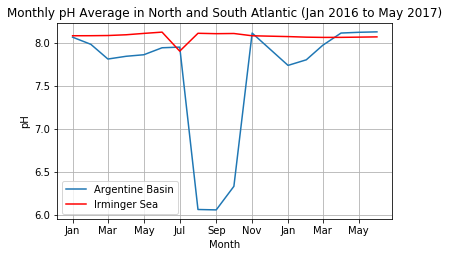

In [150]:
import matplotlib.dates as mdates
#Setting Time Axis for Plots
dates = []
for year in range(2016, 2018):
    for month in range(1, 12):
        dates.append(dt.datetime(year=year, month=month, day=1))
y1 = spacedData[:,0]
ax.plot(dates[:17],y1)
#Configuring x-axis read out so dates are displayed clearly
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%b')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.plot(dates[:17],y1,label='Argentine Basin')
plt.title('Monthly pH Average in North and South Atlantic (Jan 2016 to May 2017)')
plt.xlabel('Month')
plt.ylabel('pH')
plt.grid(b=True, which='major', axis='both')
y2 = spacedData[:,1]
plt.plot(dates[:17],y2,'r',label='Irminger Sea')
plt.legend(loc='lower left')
plt.show()
